# Create  Low-frequency magnitude spectra of stimulus amplitude envelopes

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, resample, butter, filtfilt
import os

##### Define song and graph path 


In [2]:
# Define the file path template and directory
file_template = r'\music\song\music_{:02d}.mp3'
output_dir = r'\music\graphs'

##### Convert tempo in BPM to HZ

In [3]:
# List of tempo values (for example, you can adjust these)
tempos_BPM = [55.97, 69.44, 74.26, 82.42, 91.46, 96.15, 108.70, 120.00, 128.21, 150.00]
tempos_HZ = []
for i in range(len(tempos_BPM)):
    tempos_HZ.append(tempos_BPM[i] / 60.0)
print(f"song hz : {tempos_HZ}")

song hz : [0.9328333333333333, 1.1573333333333333, 1.2376666666666667, 1.3736666666666666, 1.5243333333333333, 1.6025, 1.8116666666666668, 2.0, 2.1368333333333336, 2.5]


##### Create graph

In [25]:
# Function to process and create a graph for each file
def process_file(file_path, tempo, index):
    # Load the song (returns waveform and sample rate)
    y, sr = librosa.load(file_path)
    
    # Design a low-pass filter
    def butter_lowpass(cutoff, fs, order=4):
        nyquist = 0.5 * fs  # Nyquist Frequency
        normal_cutoff = cutoff / nyquist  # Normalize the frequency
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a
    
    # Apply the filter to the signal
    def lowpass_filter(data, cutoff, fs, order=4):
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(b, a, data)
        return y
    
    cutoff_frequency = 3  # Cut-off frequency of the filter (Hz)

    # Step 1: Extract amplitude envelope using Hilbert transform
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)

    # Step 2: Resample the amplitude envelope to 125 Hz (as done in the paper)
    target_sr = 125
    amplitude_envelope_resampled = resample(amplitude_envelope, int(len(amplitude_envelope) * target_sr / sr))

    # Step 3: Compute the FFT (Fast Fourier Transform) of the resampled amplitude envelope
    n = len(amplitude_envelope_resampled)
    Y = np.fft.fft(amplitude_envelope_resampled)
    frequencies = np.fft.fftfreq(n, d=1/target_sr)
    magnitude = np.abs(Y)

    # Step 4: Focus on low frequencies (e.g., up to 15 Hz)
    low_freq_mask = frequencies > 0
    frequencies = frequencies[low_freq_mask]
    magnitude = magnitude[low_freq_mask]
    low_freq_indices = frequencies <= 15
    frequencies = frequencies[low_freq_indices]
    magnitude = magnitude[low_freq_indices]
    filtered_signal = lowpass_filter(magnitude, cutoff_frequency, target_sr)

    # Step 5: Add vertical lines for tempo-related frequencies behind the bars
    plt.axvline(x=tempo / 4, color='blue', linestyle='--', linewidth=2, label='1/4x Tempo', zorder=0)
    plt.axvline(x=tempo / 2, color='orange', linestyle='--', linewidth=2, label='1/2x Tempo', zorder=0)
    plt.axvline(x=tempo, color='green', linestyle='--', linewidth=2, label='Tempo', zorder=0)
    plt.axvline(x=tempo * 2, color='red', linestyle='--', linewidth=2, label='2x Tempo', zorder=0)
    plt.axvline(x=tempo * 4, color='purple', linestyle='--', linewidth=2, label='4x Tempo', zorder=0)
    plt.axvline(x=tempo * 8, color='brown', linestyle='--', linewidth=2, label='8x Tempo', zorder=0)

    # Plot the magnitude spectrum as a bar plot (bars are plotted above the lines)
    plt.bar(frequencies, magnitude, width=0.2, color='black', zorder=1)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(f'Low-Frequency Magnitude Spectrum - music_{index:02d}.mp3')

    plt.legend()
    
    # Save the plot as an image file
    output_file = os.path.join(output_dir, f'music_{index:02d}_spectrum.png')
    plt.savefig(output_file)
    plt.close()  # Close the plot to free memory

In [ ]:
# Loop through 10 files and process them
for i in range(1, 11):  # From music_01.mp3 to music_10.mp3
    file_path = file_template.format(i)
    tempo = tempos_HZ[i-1]  # Assign a different tempo for each file
    process_file(file_path, tempo, i)

print("Graphs created and saved successfully!")

In [ ]:
# Design a low-pass filter
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyquist  # Normalize the frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter to the signal
def lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

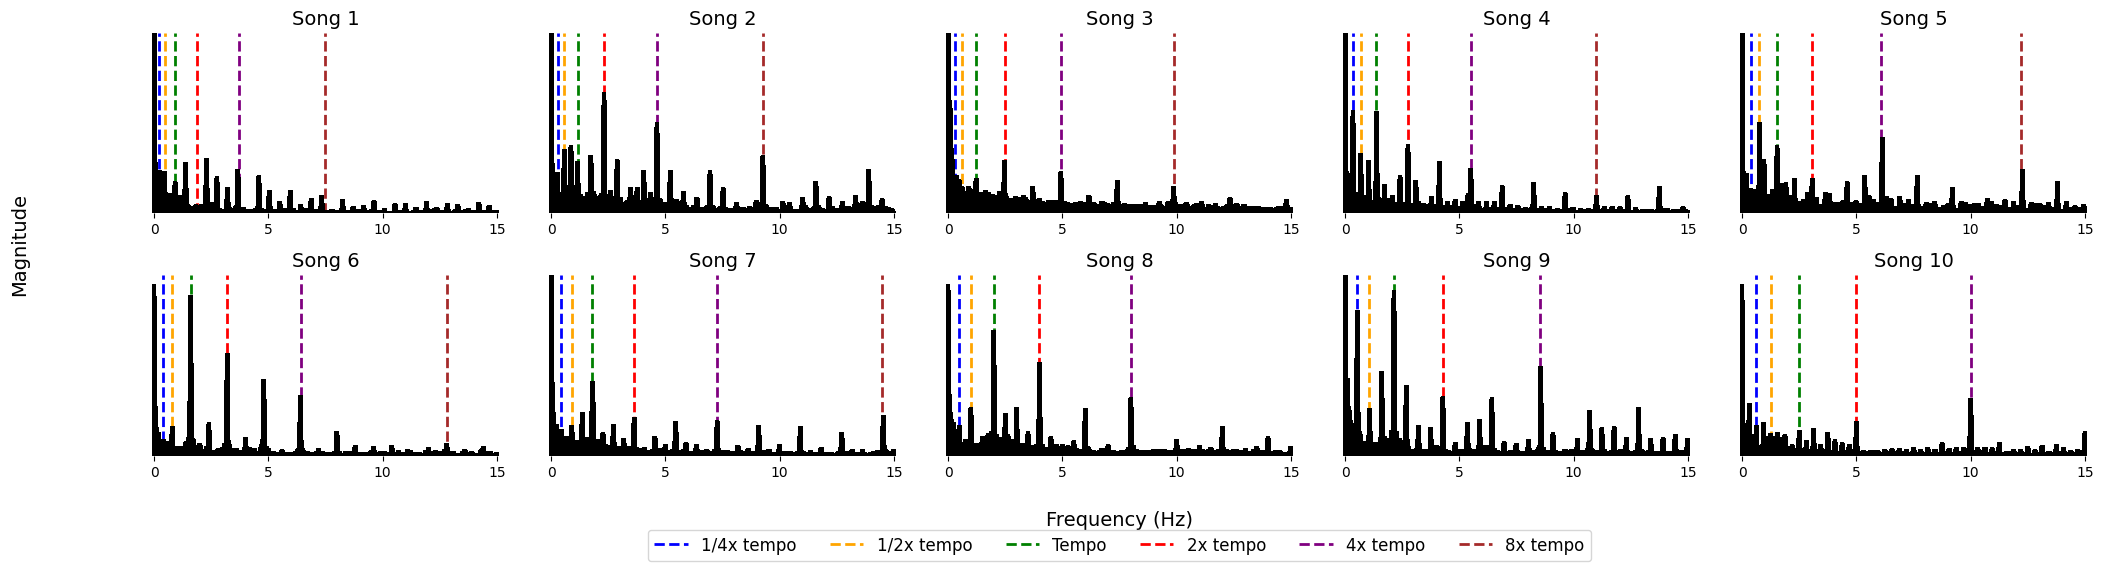

All graphs created and saved in one picture successfully!


In [45]:
cutoff_frequency = 5  # Cut-off frequency of the filter (Hz)
max_frequency = 15  # The maximum frequency to be shown on the plot


# Create a figure with subplots (2 rows x 5 columns)
fig, axs = plt.subplots(2, 5, figsize=(20, 5))
axs = axs.ravel()  # Flatten the 2D array of subplots to 1D

# Loop through 10 files and process them
for i in range(1, 11):  # From music_01.mp3 to music_10.mp3
    file_path = file_template.format(i)
    tempo = tempos_HZ[i-1]  # Assign a different tempo for each file
    
    # Load the song (returns waveform and sample rate)
    y, sr = librosa.load(file_path)
    
    # Step 1: Extract amplitude envelope using Hilbert transform
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)

    # Step 2: Resample the amplitude envelope to 125 Hz (as done in the paper)
    target_sr = 125
    amplitude_envelope_resampled = resample(amplitude_envelope, int(len(amplitude_envelope) * target_sr / sr))

    # Step 3: Compute the FFT (Fast Fourier Transform) of the resampled amplitude envelope
    n = len(amplitude_envelope_resampled)
    Y = np.fft.fft(amplitude_envelope_resampled)
    frequencies = np.fft.fftfreq(n, d=1/target_sr)
    magnitude = np.abs(Y)

    # Step 4: Focus on low frequencies (e.g., up to 15 Hz)
    low_freq_mask = frequencies > 0
    frequencies = frequencies[low_freq_mask]
    magnitude = magnitude[low_freq_mask]
    low_freq_indices = frequencies <= max_frequency
    frequencies = frequencies[low_freq_indices]
    magnitude = magnitude[low_freq_indices]
    filtered_signal = lowpass_filter(magnitude, cutoff_frequency, target_sr)

    # Plot the magnitude spectrum as a bar plot (bars are plotted above the lines)
    axs[i-1].bar(frequencies, filtered_signal, width=0.2, color='black', zorder=1)
    
    # Step 5: Add vertical lines for tempo-related frequencies behind the bars, but only if within the range
    if tempo / 4 <= max_frequency:
        axs[i-1].axvline(x=tempo / 4, color='blue', linestyle='--', linewidth=2, zorder=0)
    if tempo / 2 <= max_frequency:
        axs[i-1].axvline(x=tempo / 2, color='orange', linestyle='--', linewidth=2, zorder=0)
    if tempo <= max_frequency:
        axs[i-1].axvline(x=tempo, color='green', linestyle='--', linewidth=2, zorder=0)
    if tempo * 2 <= max_frequency:
        axs[i-1].axvline(x=tempo * 2, color='red', linestyle='--', linewidth=2, zorder=0)
    if tempo * 4 <= max_frequency:
        axs[i-1].axvline(x=tempo * 4, color='purple', linestyle='--', linewidth=2, zorder=0)
    if tempo * 8 <= max_frequency:
        axs[i-1].axvline(x=tempo * 8, color='brown', linestyle='--', linewidth=2, zorder=0)
    
    # Label for each subplot
    axs[i-1].set_title(f'Song {i}', fontsize=14)
    axs[i-1].set_xticks([0, 5, 10, 15])
    axs[i-1].set_yticks([])

    # Set specific y-limits for certain graphs
    if i == 1: 
        axs[i-1].set_ylim(0, 700)
    elif i == 2:  
        axs[i-1].set_ylim(0, 500)
    elif i == 3:  
        axs[i-1].set_ylim(0, 200)
    elif i == 4:  
        axs[i-1].set_ylim(0, 350)
    elif i == 5:  
        axs[i-1].set_ylim(0, 500)
    elif i == 7:  
        axs[i-1].set_ylim(0, 700)
    elif i == 9:  
        axs[i-1].set_ylim(0, 80)
    elif i == 20:  
        axs[i-1].set_ylim(0, 300)

    # Remove the rectangle around the plot (disable spines)
    axs[i-1].spines['top'].set_visible(False)
    axs[i-1].spines['right'].set_visible(False)
    axs[i-1].spines['left'].set_visible(False)
    axs[i-1].spines['bottom'].set_visible(False)

# Add a single legend for all subplots
legend_labels = ['1/4x tempo', '1/2x tempo', 'Tempo', '2x tempo', '4x tempo', '8x tempo']
legend_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Add the legend below the plot
fig.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=6, fontsize=12)

# Add common x and y labels
fig.text(0.5, -0.05, 'Frequency (Hz)', ha='center', va='center', fontsize=14)  # Bottom center x-axis label
fig.text(-0.05, 0.5, 'Magnitude', ha='center', va='center', rotation='vertical', fontsize=14)  # Center-left y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the full figure as a single image file
output_file = r'D:\music\graphs\resize_graph.png'
plt.savefig(output_file, bbox_inches='tight')
plt.show()

print("All graphs created and saved in one picture successfully!")


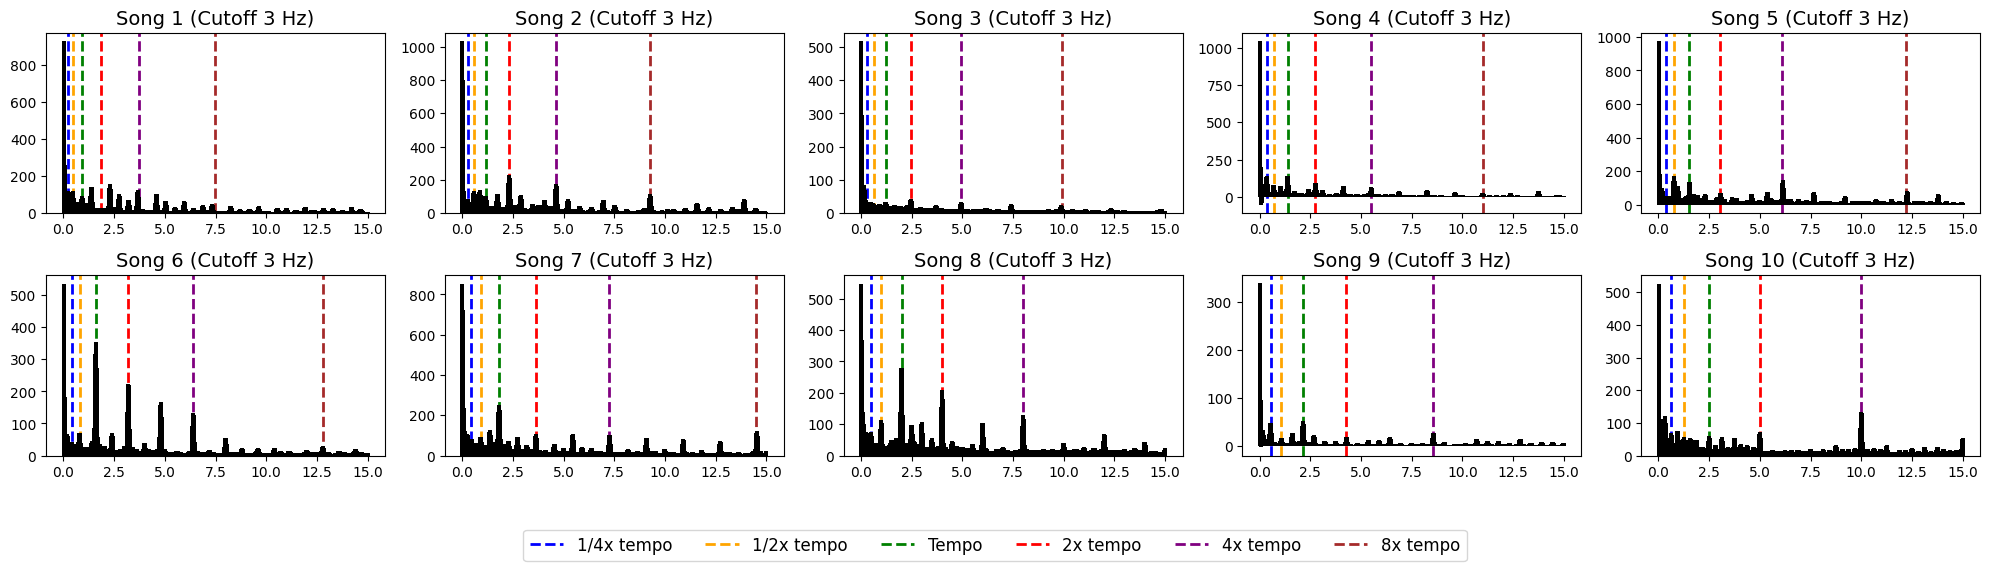

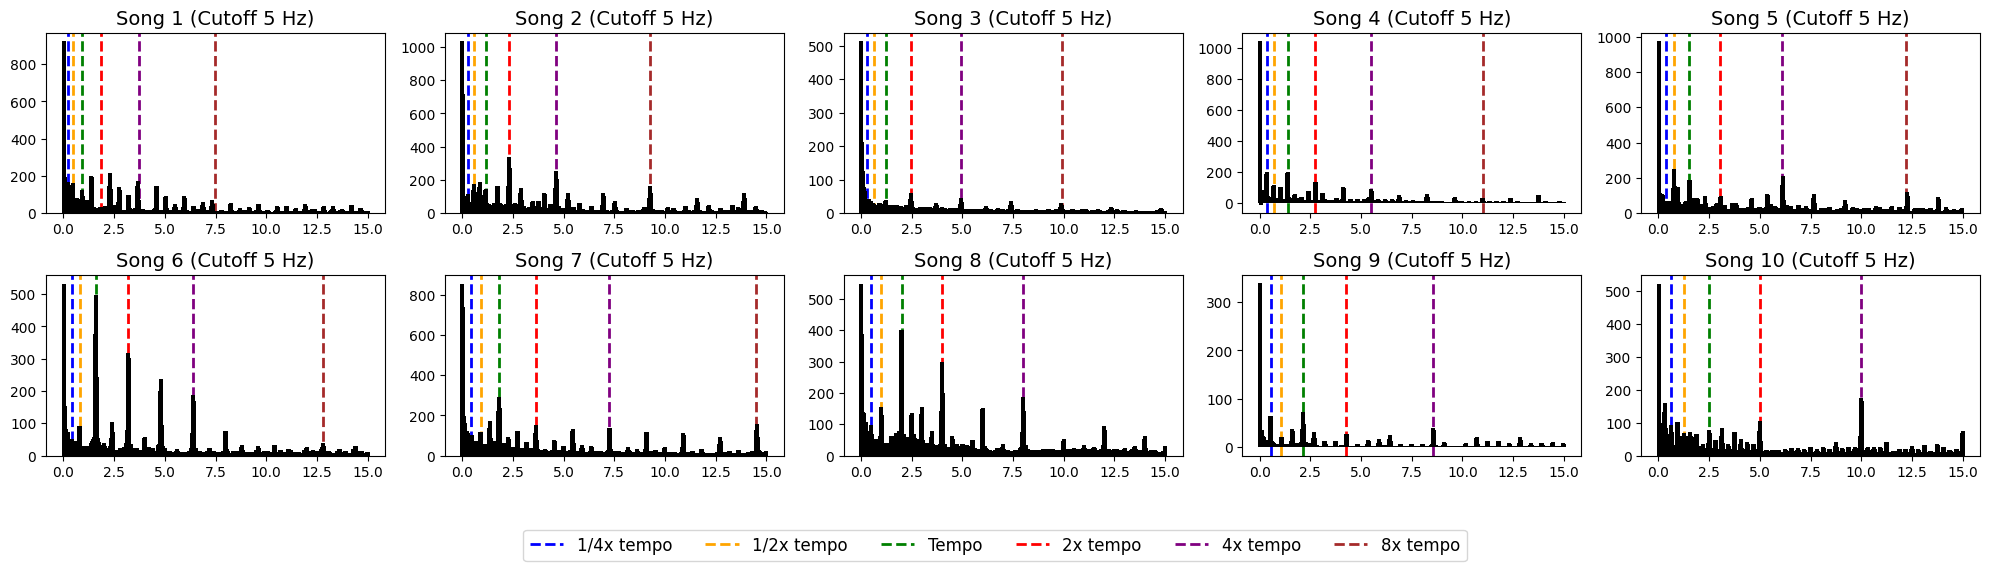

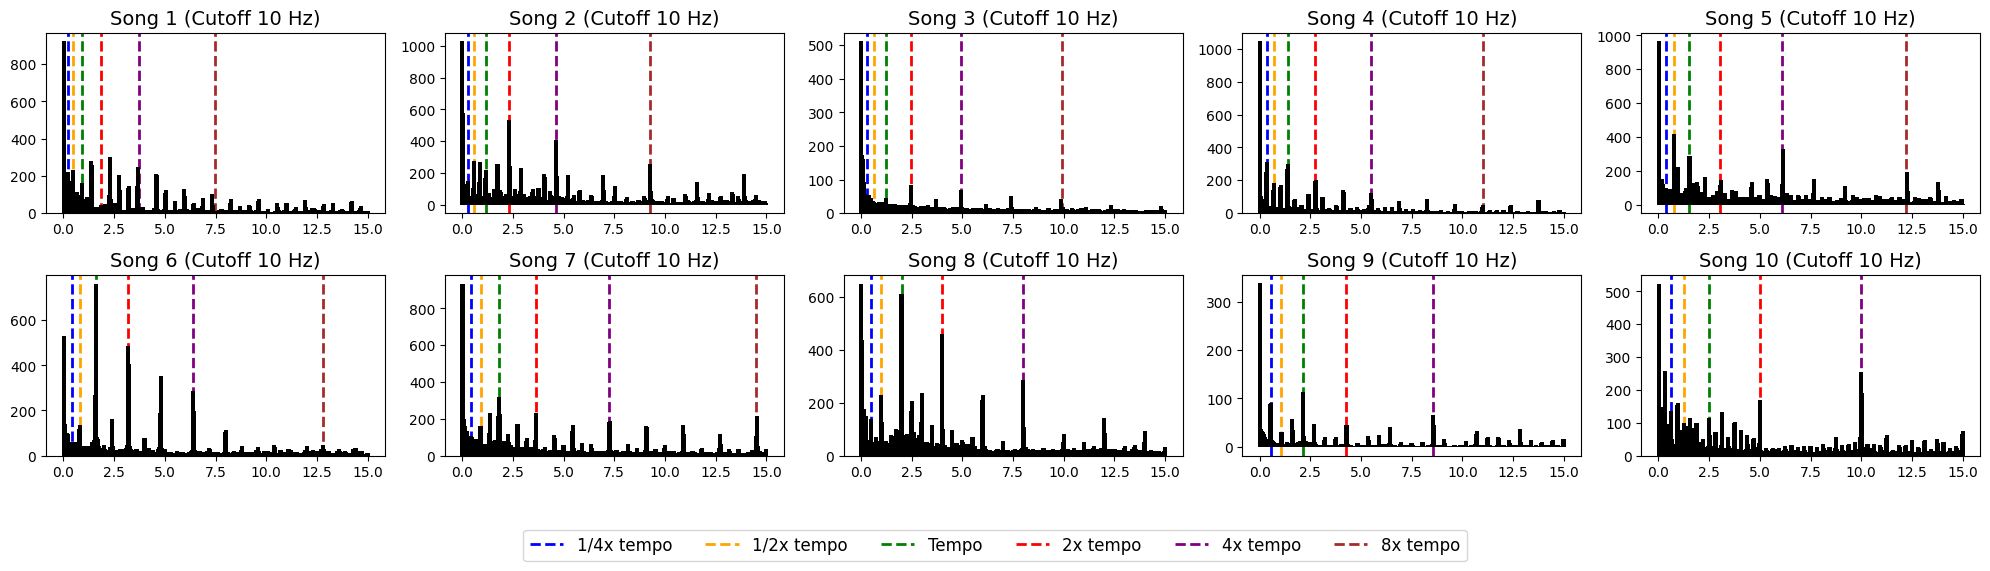

In [41]:
cutoff_frequencies = [3, 5, 10]  # Test with different cutoff frequencies

for cutoff_frequency in cutoff_frequencies:
    fig, axs = plt.subplots(2, 5, figsize=(20, 5))
    axs = axs.ravel()  # Flatten the 2D array of subplots to 1D
    
    for i in range(1, 11):  # From music_01.mp3 to music_10.mp3
        file_path = file_template.format(i)
        tempo = tempos_HZ[i-1]  # Assign a different tempo for each file
        
        # Load the song (returns waveform and sample rate)
        y, sr = librosa.load(file_path)
        
        # Step 1: Extract amplitude envelope using Hilbert transform
        analytic_signal = hilbert(y)
        amplitude_envelope = np.abs(analytic_signal)

        # Step 2: Resample the amplitude envelope to 125 Hz (as done in the paper)
        target_sr = 125
        amplitude_envelope_resampled = resample(amplitude_envelope, int(len(amplitude_envelope) * target_sr / sr))

        # Step 3: Compute the FFT (Fast Fourier Transform) of the resampled amplitude envelope
        n = len(amplitude_envelope_resampled)
        Y = np.fft.fft(amplitude_envelope_resampled)
        frequencies = np.fft.fftfreq(n, d=1/target_sr)
        magnitude = np.abs(Y)

        # Step 4: Focus on low frequencies (e.g., up to 15 Hz)
        low_freq_mask = frequencies > 0
        frequencies = frequencies[low_freq_mask]
        magnitude = magnitude[low_freq_mask]
        low_freq_indices = frequencies <= max_frequency
        frequencies = frequencies[low_freq_indices]
        magnitude = magnitude[low_freq_indices]
        filtered_signal = lowpass_filter(magnitude, cutoff_frequency, target_sr)

        # Plot the magnitude spectrum as a bar plot
        axs[i-1].bar(frequencies, filtered_signal, width=0.2, color='black', zorder=1)

        # Step 5: Add vertical lines for tempo-related frequencies behind the bars
        if tempo / 4 <= max_frequency:
            axs[i-1].axvline(x=tempo / 4, color='blue', linestyle='--', linewidth=2, zorder=0)
        if tempo / 2 <= max_frequency:
            axs[i-1].axvline(x=tempo / 2, color='orange', linestyle='--', linewidth=2, zorder=0)
        if tempo <= max_frequency:
            axs[i-1].axvline(x=tempo, color='green', linestyle='--', linewidth=2, zorder=0)
        if tempo * 2 <= max_frequency:
            axs[i-1].axvline(x=tempo * 2, color='red', linestyle='--', linewidth=2, zorder=0)
        if tempo * 4 <= max_frequency:
            axs[i-1].axvline(x=tempo * 4, color='purple', linestyle='--', linewidth=2, zorder=0)
        if tempo * 8 <= max_frequency:
            axs[i-1].axvline(x=tempo * 8, color='brown', linestyle='--', linewidth=2, zorder=0)
        
        axs[i-1].set_title(f'Song {i} (Cutoff {cutoff_frequency} Hz)', fontsize=14)

    fig.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=6, fontsize=12)
    plt.tight_layout()
    
    
    output_file = r'D:\music\combined_spectrum_cutoff_{}hz.png'.format(cutoff_frequency)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
